# 1. Objective:
The objective of a customer clustering project is to identify groups of customers with similar characteristics. This can be used to improve customer segmentation, target marketing campaigns, and develop new products and services.
I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database.

# 2. Downloading the basic libraries

In [1333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")


import statsmodels.api as sm 


# 3. Reading the data

In [1334]:

df = pd.read_csv(r"C:\Users\prasa\Dropbox\PC\Desktop\ML-Projects\Portfolio\Customer segmentation\marketing_campaign.csv",sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# 4. About data

1. `ID`: Unique identifier for a customer
2. `Year_Birth`: Customer's birth year
3. `Education`: Education Qualification of customer
4. `Income`: Customer's yearly household income
5. `Kidhome`: Number of children in customer's household
6. `Teenhome`: Number of teenagers in customer's household
7. `Dt_Customer`: Date of customer's enrollment with the company
8. `Recency`: Number of days since customer's last purchase
9. `Mnt`: Amount spent on items like fruits, wine and other products
10. `AcceptedCmpn`: Indicates whether the customer accepted the offer in the nth campaign or not. 
11. `Recency`: No of days since last visit.
12. `Z_Revenue`: Revenue generated through the marketing 



# 5. Performing EDA

In [1335]:
df.shape

(2240, 29)

In [1336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [1337]:
# Check for null values
df.columns[df.isna().sum()>0]

Index(['Income'], dtype='object')

In [1338]:
# Dropping the null records 
df.dropna(inplace=True)
df.columns[df.isna().sum()>0]

Index([], dtype='object')

In [1339]:
df.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
444,2106,1974,2n Cycle,Married,20130.0,0,0,17-03-2014,99,0,...,8,0,0,0,0,0,0,3,11,0
2138,2948,1954,Master,Divorced,62637.0,0,1,01-03-2014,76,104,...,2,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,0,0,0,0,0,0,3,11,0


In [1340]:
dates = pd.to_datetime(df['Dt_Customer'])
print("Minimum date in Customer enrollment: ", min(dates))
print("Maximum date in customer enrollment: ", max(dates))


Minimum date in Customer enrollment:  2012-01-08 00:00:00
Maximum date in customer enrollment:  2014-12-06 00:00:00


## 5.1. Categocrical variables univariate analysis

In [1341]:
columns_to_analyse = ['Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp1',
                      'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4',
                     'AcceptedCmp5','Complain','Response']


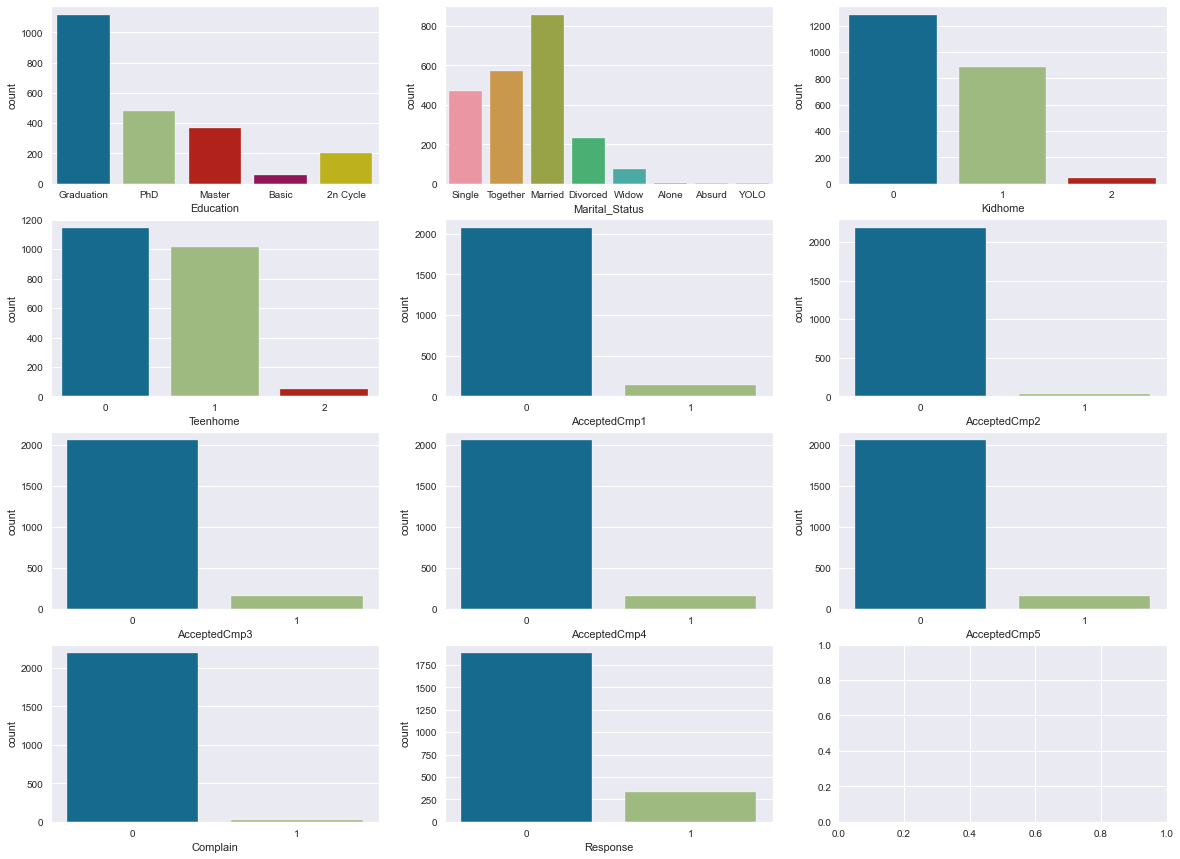

In [1342]:
fig,axis = plt.subplots(nrows=4,ncols=3,sharex=False,sharey=False,figsize=(20,15))

column_value = 0
for i in range(4):
    for j in range(3):
        if column_value ==11:
            break
        else:
            
            sb.countplot(data=df,x=columns_to_analyse[column_value],ax=axis[i][j])
            column_value+=1


## 5.2. Numerical variables univariate distribution analysis

In [1343]:
dist_columns = ['Income','Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Complain','Response']


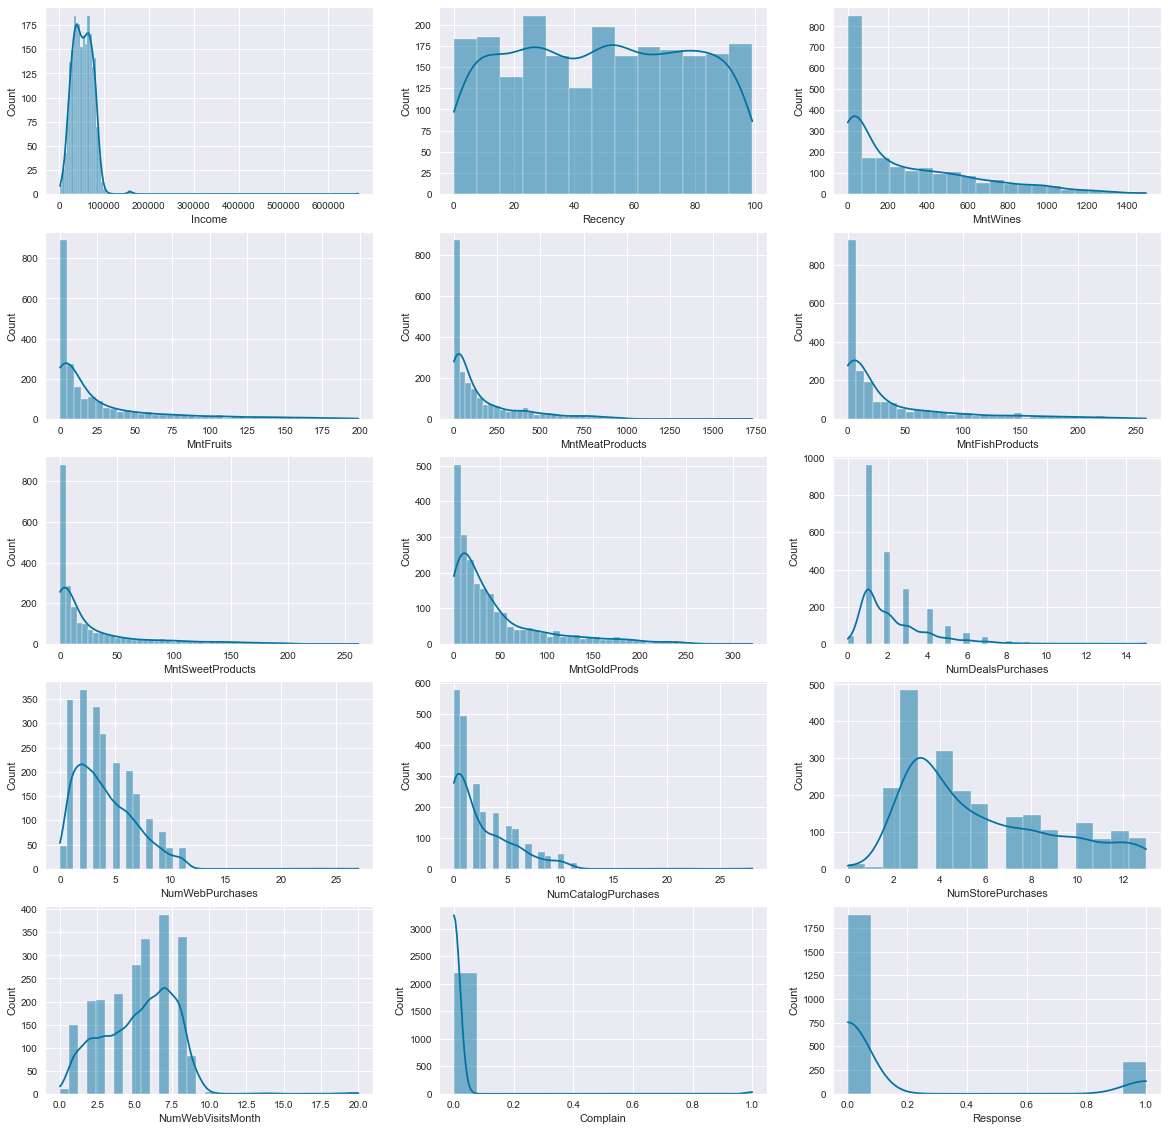

In [1344]:
fig,axis = plt.subplots(nrows=5,ncols=3,sharex=False,sharey=False,figsize=(20,20))

column_value = 0
for i in range(5):
    for j in range(3):
        if column_value ==15:
            break
        else:
            
            sb.histplot(data=df,x=dist_columns[column_value],ax=axis[i][j],kde=True)
            column_value+=1

## 5.3. Observations:
1. Majority of the customers are educated. Very less number of customers are with basic education. 
2. Married customers count is high comparing to other status.
3. Customers with no kids are more in number in number.
4. Most of the customers are having salary < 100000
5. Amount spending on different products like Wine, Meat, Gold.. etc is following a log normal distribution, which indicates that the very less no.of customers are spending huge amount on purchasing of products.
6. Customers with 0 or 1 teen at home are almost same in number. 

## 5.4. Extracting some of the useful features from the dataframe

1. `Age`: Calculating the age of the customer using `Year_Birth` and max_date in `Dt_customer` 

2014-12-06 00:00:00


<AxesSubplot:xlabel='Age', ylabel='Count'>

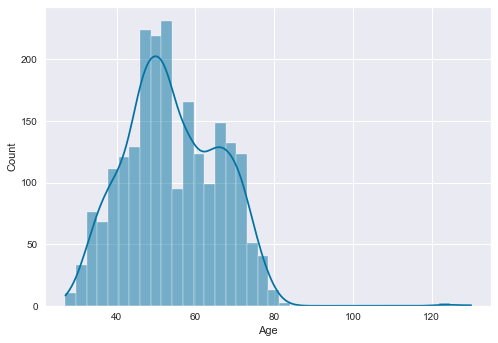

In [1345]:
print(max(dates))
max_year = 2014
df['Age'] = df['Year_Birth'].apply(lambda x: 2023-x)
sb.histplot(data=df,x='Age',kde=True)

`Age` distribution looks similar to the normal distribution. Not an exact normal distribution, but resembling it with mean value arounf 45


2. `Total_spent`: Total amount spent by the customer on various products

In [1346]:
df["total_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

<AxesSubplot:xlabel='total_Spent', ylabel='Count'>

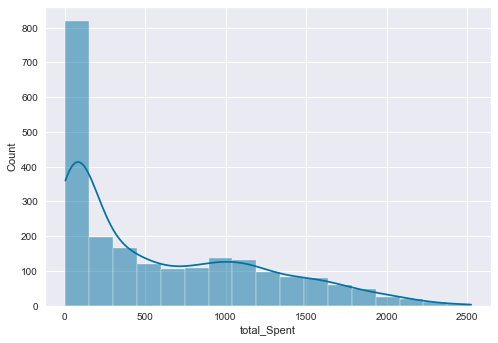

In [1347]:
sb.histplot(data=df,x='total_Spent',kde=True)

Majority of the customers spent less than $1200. Very less number of customers spent huge money for purchasing different products.  

3. `Total_Children` : No.of kids + No.of teens

In [1348]:
df['Total_Children'] = df['Kidhome']+df['Teenhome']

<AxesSubplot:>

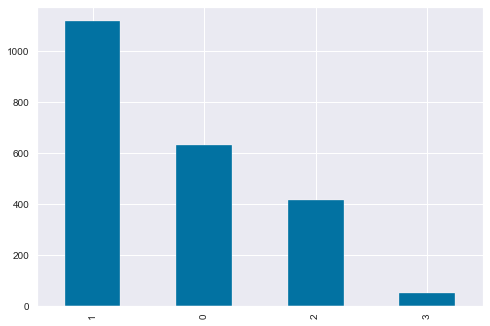

In [1349]:
df['Total_Children'].value_counts().plot(kind='bar')

In [1350]:
print("Total no of customers: ",len(df['ID'].unique()))
print("Total no of customers with atleast 1 child at home are: ", len(df[df['Total_Children']>0]))

Total no of customers:  2216
Total no of customers with atleast 1 child at home are:  1583


Out of total 2216 customers, 1583 customers are having at least one child at home

4. `Living_Status` : Feature that denotes whether the person is living alone or living with their partner. 
Considerations are as follows:
    * `Without Partner` : Divorced, Single, Absured, Widow, Alone, YOLO
    * `With Partner` : Married, Together

In [1351]:
df['Living_Status'] = df['Marital_Status'].replace({
    'Divorced':'Without Partner',
    'Single':'Without Partner',
    'Absurd': 'Without Partner',
    'Widow': 'Without Partner',
    'Alone': 'Without Partner',
    'YOLO': 'Without Partner',
    'Married': 'With Partner',
    'Together': 'With Partner'
})

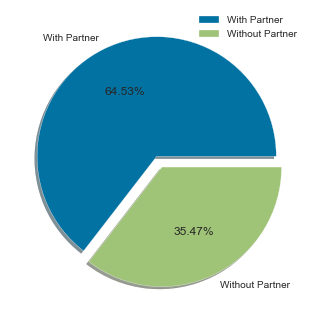

In [1352]:
plt.pie(df['Living_Status'].value_counts(),autopct='%.2f%%',labels=['With Partner', 'Without Partner'], 
        explode=[0,0.1],shadow=True)
plt.legend()
plt.show()

Out of all the customers, 65% of the customers are living with their partners. Remaining customers are living without their partner.

5. `Education status`: Segmenting based on the education of the customers. Considerations are as follows
    * Graduate: Graduation
    * Under Graduation: 2n Cycle, Basic
    * Post Graduate: Master, PhD
    

In [1353]:
df['Education_level'] = df['Education'].replace({
    'Graduation': 'Graduate',
    '2n Cycle': 'Under Graduation',
    'Basic': 'Under Graduation',
    'Master': 'Post Graduation',
    'PhD': 'Post Graduation'
})


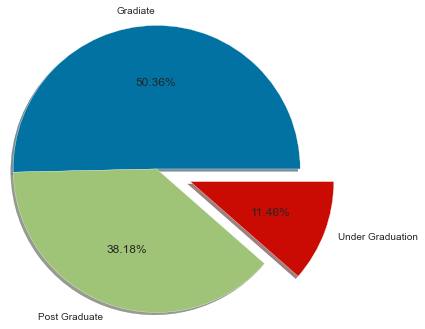

In [1354]:
plt.pie(df['Education_level'].value_counts(),autopct='%.2f%%',labels=['Gradiate','Post Graduate', 'Under Graduation'], 
        explode=[0,0,0.3], rotatelabels=0, radius=1.2,shadow=True)
plt.show()

Total 89% of the customers are having graduation degrees. This indicates that most of the customers are Educated.

6. `Family_Size`: Total members within the family as per our data.
    This includes, no. of teens + no. of kids +  partner
    

In [1355]:
df['Family_Size'] = df['Total_Children'] + df['Living_Status'].replace({
    'With Partner': 2,
    'Without Partner': 1
})

Text(0, 0.5, 'Count of customers')

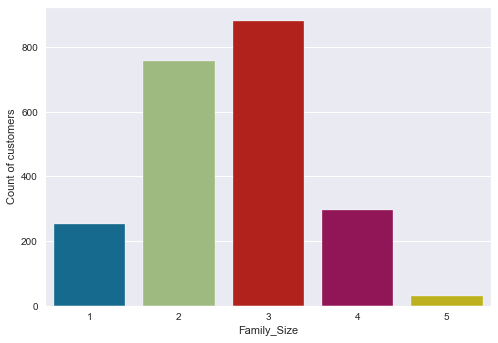

In [1356]:
x = pd.DataFrame(df.groupby('Family_Size')['ID'].count()).reset_index()
sb.barplot(data=x,x='Family_Size',y='ID')
plt.ylabel("Count of customers")

7. `Is_Parent` : 1 if the no.of children>0 and age of the customer >=30

In [1357]:
def parent_feature_extraction(row):
    if row.Total_Children>0:
        return 1
    else:
        return 0
    
        
        

In [1358]:
df['Is_Parent'] = df.apply(parent_feature_extraction,axis=1)

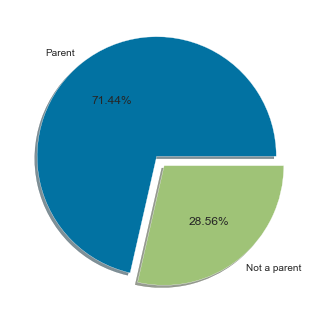

In [1359]:
plt.pie(df['Is_Parent'].value_counts(),autopct='%.2f%%',shadow=True, explode=[0,0.1],
       labels = ['Parent', 'Not a parent'])
plt.show()

67% of the customers are parents as per our consideration.

8. `Customer_duration`: Indicates the difference between customer enrolled date and the most recent customer enrolled date

In [1360]:
days = max(dates) - pd.to_datetime(df['Dt_Customer'])
df['Customer_Duration'] = days
df['Customer_Duration'] = df["Customer_Duration"].apply(lambda x: int(str(x).split(" ")[0]))
df.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Age,total_Spent,Total_Children,Living_Status,Education_level,Family_Size,Is_Parent,Customer_Duration
1671,1964,1951,Graduation,Together,86610.0,0,0,05-09-2013,66,446,...,11,0,72,1603,0,With Partner,Graduate,2,0,576
555,8692,1952,Graduation,Together,43462.0,1,1,12-09-2012,50,90,...,11,0,71,240,2,With Partner,Graduate,4,1,727
2020,9829,1978,Graduation,Together,28587.0,1,0,12-02-2014,42,22,...,11,0,45,78,1,With Partner,Graduate,3,1,4


<AxesSubplot:xlabel='Customer_Duration', ylabel='Count'>

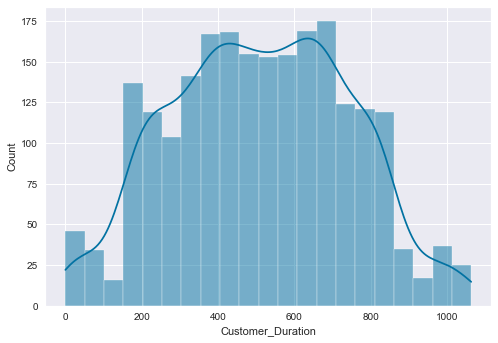

In [1361]:
sb.histplot(data=df,x='Customer_Duration',kde=True)

In [1362]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,total_Spent,Total_Children,Family_Size,Is_Parent,Customer_Duration
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.009477,3.0,11.0,0.150271,54.179603,607.075361,0.947202,2.592509,0.714350,512.006318
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.096907,0.0,0.0,0.357417,11.985554,602.900476,0.749062,0.905722,0.451825,232.469034
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.0,11.0,0.000000,27.000000,5.000000,0.000000,1.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.0,11.0,0.000000,46.000000,69.000000,0.000000,2.000000,0.000000,340.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,3.0,11.0,0.000000,53.000000,396.500000,1.000000,3.000000,1.000000,513.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,3.0,11.0,0.000000,64.000000,1048.000000,1.000000,3.000000,1.000000,686.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,3.0,11.0,1.000000,130.000000,2525.000000,3.000000,5.000000,1.000000,1063.000000


In [1363]:
# Constant features in the data set

In [1364]:
df['Z_CostContact'].value_counts()

3    2216
Name: Z_CostContact, dtype: int64

In [1365]:
df['Z_Revenue'].value_counts()

11    2216
Name: Z_Revenue, dtype: int64

## 5.5. Observations from EDA


1. `Age` distribution looks similar to the normal distribution. Not an exact normal distribution, but resembling it with mean value arounf 45.
2. Majority of the customers spent less than $1200. Very less number of customers spent huge money for purchasing different products.  
3. Out of total 2216 customers, 1583 customers are having at least one child at home
4. Total 89% of the customers are having graduation degrees. This indicates that most of the customers are Educated.
5. Out of all the customers, 65% of the customers are living with their partners. Remaining customers are living without their partner.
6. 67% of the customers are parents as per our consideration.

## 5.6. Understanding the correlation between the features

<AxesSubplot:>

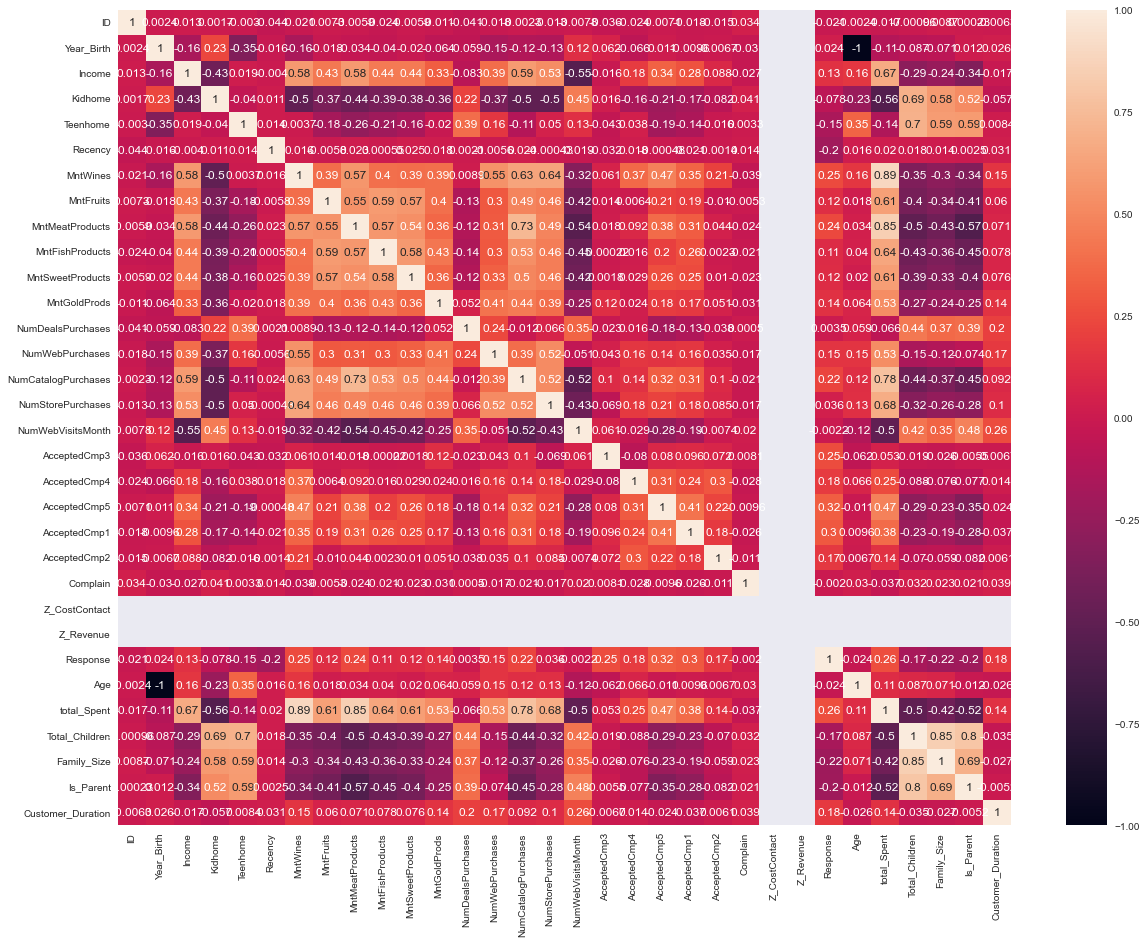

In [1366]:
plt.figure(figsize=(20,15))
sb.heatmap(df.corr(),annot=True)


## 5.7. Check for Outliers

<AxesSubplot:ylabel='total_Spent'>

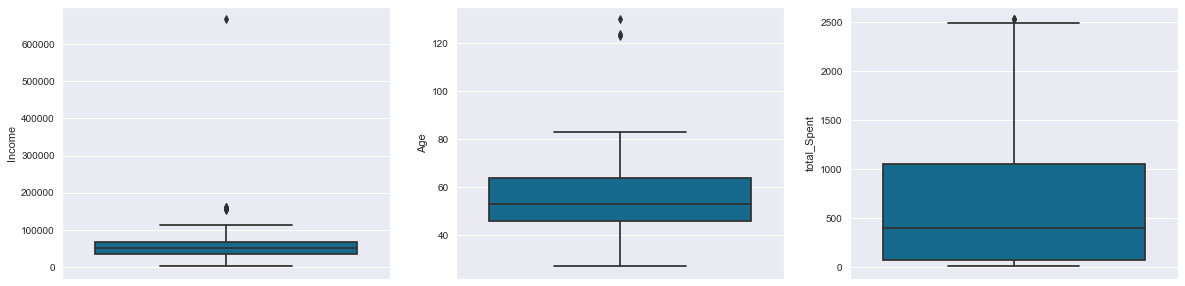

In [1367]:
cols_to_check = ['Income','Age','total_Spent']
fig,axis = plt.subplots(1,3,sharex=False,sharey=False,figsize=(20,5))
sb.boxplot(data=df,y=cols_to_check[0],ax=axis[0])
sb.boxplot(data=df,y=cols_to_check[1],ax=axis[1])
sb.boxplot(data=df,y=cols_to_check[2],ax=axis[2])

In [1368]:
# As the no. of outliers are less in the data frame, Let's drop those outlier values
df = df[df['Age']<80]
df = df[df['Income']<600000]
print("Records after deleting the outliers in the data frame: ",len(df) )

Records after deleting the outliers in the data frame:  2204


# 6. Data preprocessing
1. Encoding of the categorical features.
2. Scaling the data 
3. Dimensionality reduction.

### 6.1. Performing label encoding of the categorical data:


In [1369]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = df.select_dtypes(include=object).columns
columns_to_encode

Index(['Education', 'Marital_Status', 'Dt_Customer', 'Living_Status',
       'Education_level'],
      dtype='object')

In [1370]:
le = LabelEncoder()
df['Living_Status'] = le.fit_transform(df['Living_Status'])
df['Education_level'] = le.fit_transform(df['Education_level'])
df.sample(3)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Age,total_Spent,Total_Children,Living_Status,Education_level,Family_Size,Is_Parent,Customer_Duration
580,5966,1974,PhD,Married,45207.0,1,1,10-11-2012,64,203,...,11,0,49,215,2,0,1,4,1,786
940,8957,1952,2n Cycle,Single,64831.0,1,1,10-06-2013,51,480,...,11,0,71,1120,2,1,2,3,1,426
1457,2157,1972,Graduation,Together,26290.0,1,1,12-01-2013,49,15,...,11,0,51,77,2,0,0,4,1,370


In [1371]:
df.select_dtypes(include=object).columns

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object')

In [1372]:
# Let's create a subset of the data frame by deleting all the features related to campaign promotions. 
# Our interest is to segment the customers based on their spent and charectristics
df1 = df.copy()
df1.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response',
         'Dt_Customer','Education','Year_Birth','Kidhome','Teenhome','Marital_Status','Z_Revenue','Z_CostContact','ID'],axis=1,inplace=True)
df1.sample(3)


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,Age,total_Spent,Total_Children,Living_Status,Education_level,Family_Size,Is_Parent,Customer_Duration
1148,57744.0,91,350,3,39,0,0,19,2,9,...,4,8,69,411,1,0,1,3,1,360
309,42670.0,12,154,2,46,20,4,15,1,4,...,4,4,31,241,0,0,1,2,0,588
1769,47808.0,30,123,1,26,2,0,72,2,3,...,3,7,48,224,1,0,1,3,1,412


### 6.2. Scaling our data

In [1373]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [1374]:
scaled_df = pd.DataFrame(scalar.fit_transform(df1),columns=df1.columns)
scaled_df.sample(3)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,NumStorePurchases,NumWebVisitsMonth,Age,total_Spent,Total_Children,Living_Status,Education_level,Family_Size,Is_Parent,Customer_Duration
1025,-0.851311,1.451854,-0.814367,-0.385955,-0.596044,-0.447211,-0.512114,-0.289697,-0.689748,-0.759162,...,-0.554429,-0.547086,0.259258,-0.803326,0.065469,-0.739369,0.573033,0.445079,0.628440,-0.322164
1427,-0.539211,1.141058,-0.793560,-0.662391,-0.667447,-0.685177,-0.658007,-0.791929,-0.689748,-0.759162,...,-0.862384,0.690032,0.173125,-0.911349,0.065469,1.352504,0.573033,-0.660845,0.628440,-0.343647
50,1.415420,0.208670,2.021352,0.619268,1.184563,2.609730,2.259848,2.820281,-0.689748,-0.394393,...,2.217159,-1.784205,1.206717,2.246242,-1.270584,-0.739369,0.573033,-0.660845,-1.591242,1.009802


### 6.3. Dimensionality reduction 
The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why we will be performing the dimensionality reduction on the selected features before modelling the data.

In [1375]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

In [1376]:
dim_reduced_data = pd.DataFrame(pca.fit_transform(scaled_df),columns=['feature1', 'feature2','feature3'])
dim_reduced_data.describe()

,feature1,feature2,feature3
count,2.204000e+03,2.204000e+03,2.204000e+03
mean,3.828355e-18,1.319775e-17,2.982087e-17
std,2.782166e+00,1.550648e+00,1.203991e+00
min,-5.747660e+00,-4.199228e+00,-3.672563e+00
25%,-2.447656e+00,-1.068445e+00,-8.678466e-01
50%,-8.871402e-01,-1.617943e-01,-5.093073e-02
75%,2.295677e+00,1.054139e+00,8.111658e-01
max,7.460525e+00,6.015818e+00,6.320865e+00


# 7. Clustering the data
Now, the no of dimensions are reduced, Let's perform the Clustering part via different methods of clustering like KMeans, Agglomorative, and DBscan methods.

## 7.1. Kmeans Clustering implementation

### 7.1.1. Fetching the correct value of K using elbow method

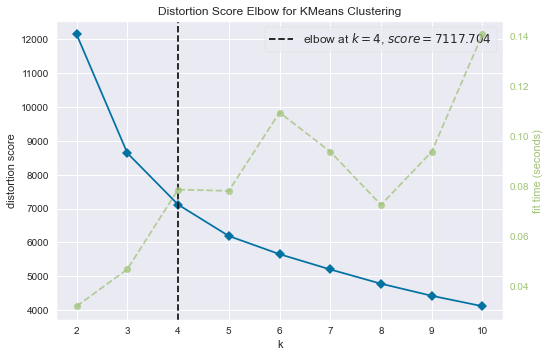

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1378]:

elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(dim_reduced_data)
elbow.show()

Optimum value of K is found to be 4 using Elbow method

### 7.1.2. Implementing KMeans clustering

In [1379]:
clusters = [3,4,5,6,7]
silhoutte_scores = []
for i in clusters:
    K_means = KMeans(n_clusters=i)
    k_means_result = K_means.fit_predict(dim_reduced_data)
    silhoutte_scores.append(silhouette_score(dim_reduced_data,k_means_result))

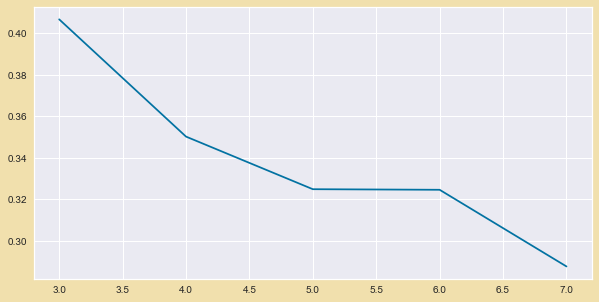

In [1380]:
sb.set_style(style='darkgrid')
figure = plt.figure(figsize=(10,5))
plt.plot(np.array([3,4,5,6,7]),silhoutte_scores)
figure.patch.set_facecolor("#F1E0AD")
plt.show()


## 7.2. Implementing Agglomorative clustering model

In [1381]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


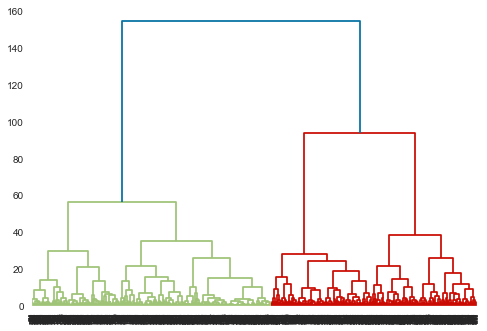

In [1382]:
linkage_data = linkage(dim_reduced_data, method='ward')
dendrogram(linkage_data)
plt.show()

In [1383]:
clusters = [3,4,5,6,7,8,9]
silhoutte_scores = []
for i in clusters:
    agglomorative = AgglomerativeClustering(n_clusters=i)
    y_predict = agglomorative.fit_predict(X = dim_reduced_data)
    silhoutte_scores.append(silhouette_score(dim_reduced_data,y_predict))
    

    


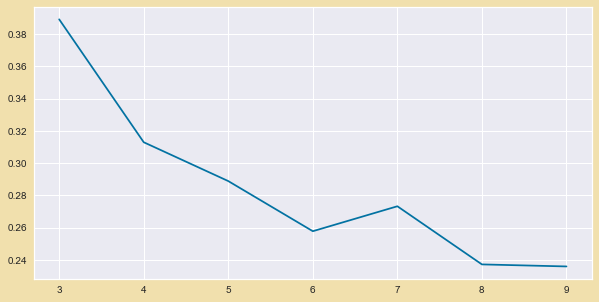

In [1384]:
figure = plt.figure(figsize=(10,5))
plt.plot(np.array(clusters),silhoutte_scores)
figure.patch.set_facecolor("#F1E0AD")
plt.show()

From the above results it is clear that the KMeans clustering model with no. of clusters as 3 is performing better than Agglomorative clustering.  Proceeding with the KMeans model.  

In [1385]:
K_means = KMeans(n_clusters=4)
cluster_value = K_means.fit_predict(dim_reduced_data)
dim_reduced_data['Cluster'] = cluster_value

## 7.3. Visualizing the clusters

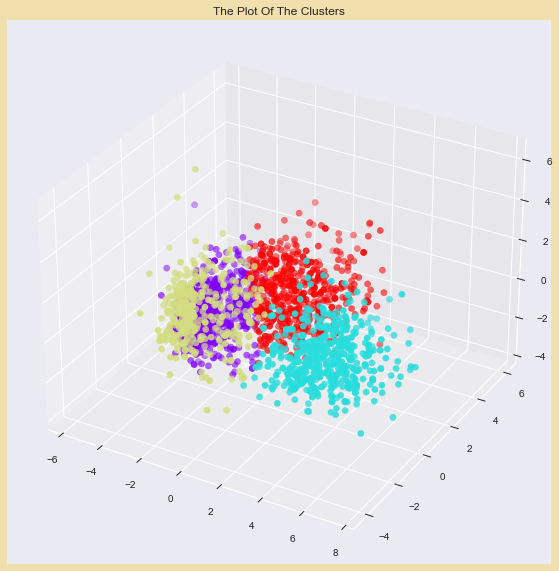

In [1386]:
x = dim_reduced_data['feature1']
y = dim_reduced_data['feature2']
z = dim_reduced_data['feature3']
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=dim_reduced_data["Cluster"], marker='o',cmap='rainbow' )
fig.patch.set_facecolor("#F1E0AD")
ax.set_title("The Plot Of The Clusters")
plt.show()

## 7.4. Cluster distribution

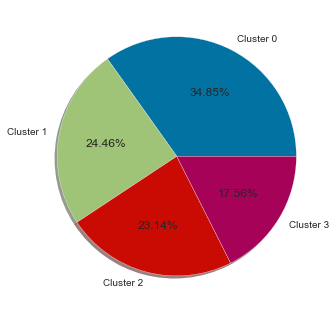

In [1387]:
dim_reduced_data['Cluster'] = cluster_value
plt.pie(dim_reduced_data['Cluster'].value_counts(),labels=["Cluster 0","Cluster 1","Cluster 2","Cluster 3"],autopct='%.2f%%',shadow=True)
#plt.pie(dim_reduced_data['Cluster'].value_counts(),labels=["Cluster 0","Cluster 1","Cluster 2"],autopct='%.2f%%',shadow=True)
plt.show()

## 7.5.Clusters on Income vs Total_Spent graph

<AxesSubplot:xlabel='total_Spent', ylabel='Income'>

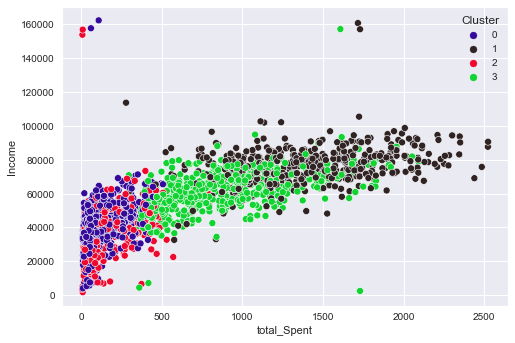

In [1388]:
df['Cluster'] = cluster_value
df1['Cluster'] = cluster_value
sb.scatterplot(data=df1,x='total_Spent',y='Income',hue='Cluster',palette=["#340A9B","#302324","#EF082E","#11D432"])

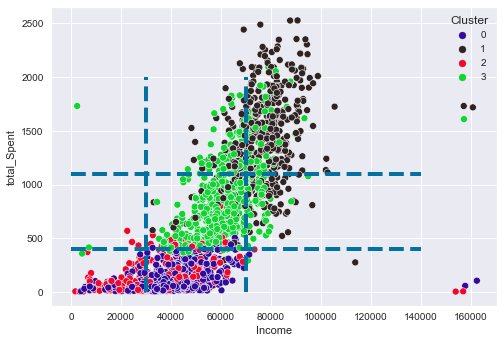

In [1389]:

sb.scatterplot(data=df1,x='Income',y='total_Spent',hue='Cluster',palette=["#340A9B","#302324","#EF082E","#11D432"])
plt.hlines(y=400,xmin=0, xmax=140000,linestyles='dashed',linewidth=4)
plt.hlines(y=1100,xmin=0, xmax=140000, linestyles='dashed',linewidth=4)
plt.vlines(x=30000,ymin=0, ymax=2000, linestyles='dashed',linewidth=4)
plt.vlines(x=70000,ymin=0, ymax=2000, linestyles='dashed',linewidth=4)


# 8. Cluster interpretation

* `Cluster 0` : Medium income & Low spent customers
* `Cluster 1`: High income & High spent customers
* `Cluster 2`: Low income & Low spent customers
* `Cluster 3`: Medium income & Medium spent

<AxesSubplot:xlabel='Cluster', ylabel='Income'>

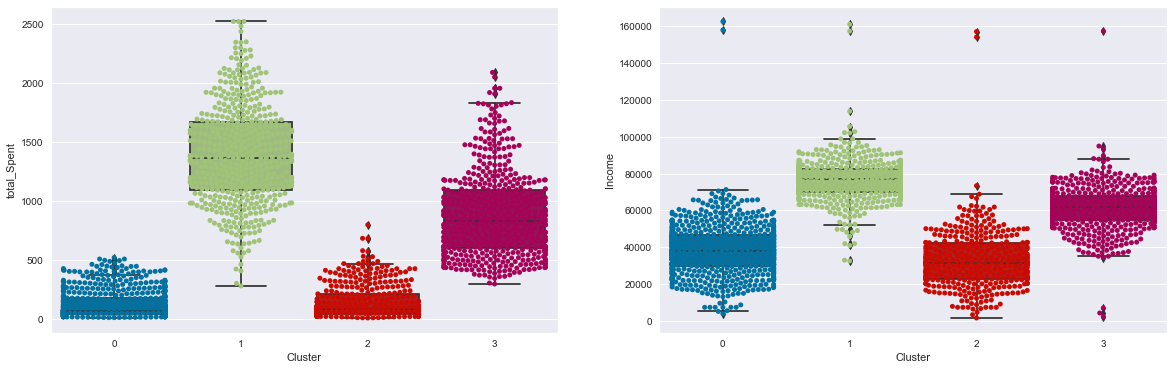

In [1390]:
fig,axis = plt.subplots(nrows=1, ncols=2,sharex=False,sharey=False, figsize=(20,6))
sb.swarmplot(data=df1,x='Cluster', y= 'total_Spent',ax = axis[0])
sb.boxplot(data=df1,x='Cluster',y='total_Spent', ax=axis[0])


sb.swarmplot(data=df1,x='Cluster', y= 'Income',ax = axis[1])
sb.boxplot(data=df1,x='Cluster',y='Income', ax=axis[1])

## 8.1. Analysing the efffectiveness of campaigns

<AxesSubplot:ylabel='count'>

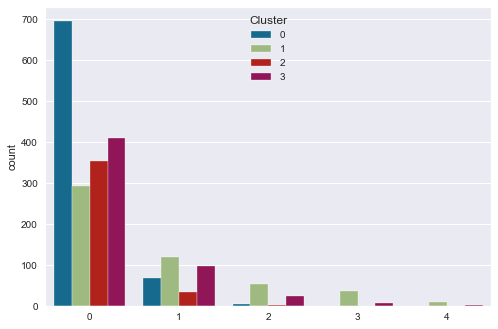

In [1391]:
x = df['AcceptedCmp1'] + df['AcceptedCmp2'] +df['AcceptedCmp3']+ df['AcceptedCmp4']+df['AcceptedCmp5']
sb.countplot(data=df,x=x,hue='Cluster')

Campaigns are not effective in grasping the customers attention. Perhaps better targeted and well planned campaigns need to be initiated to boost up the sales further. 

# 9. Customer Profiling

Let's profile clusters, inorder to understand the behavior of the customers. So that the company can understand about their valuable customers  and the customers who needs more attention from marketing team.
To decide that we will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. 

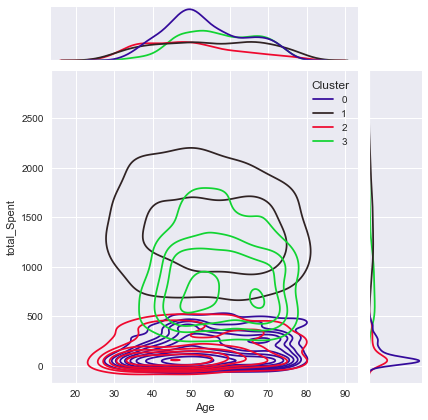

In [1392]:
personal_traits = ['Age','Total_Children', 'Family_Size','Customer_Duration','Living_Status','Is_Parent', 
                'Education_level','Kidhome', 'Teenhome']

sb.jointplot(data=df,x='Age',y='total_Spent',hue='Cluster',kind='kde',palette=["#340A9B","#302324","#EF082E","#11D432"])
plt.show()

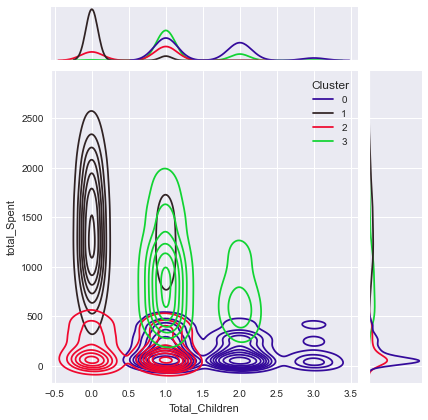

In [1393]:
sb.jointplot(data=df,x='Total_Children',y='total_Spent',hue='Cluster',kind='kde',palette=["#340A9B","#302324","#EF082E","#11D432"])
plt.show()

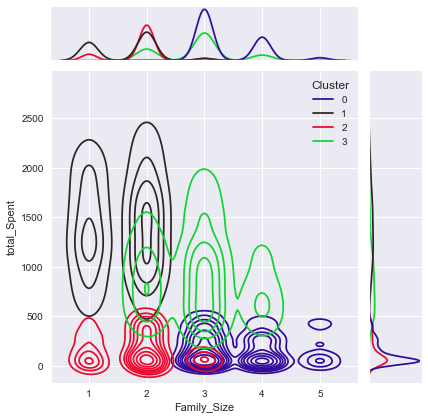

In [1394]:
sb.jointplot(data=df,x='Family_Size',y='total_Spent',hue='Cluster',kind='kde',palette=["#340A9B","#302324","#EF082E","#11D432"])
plt.show()

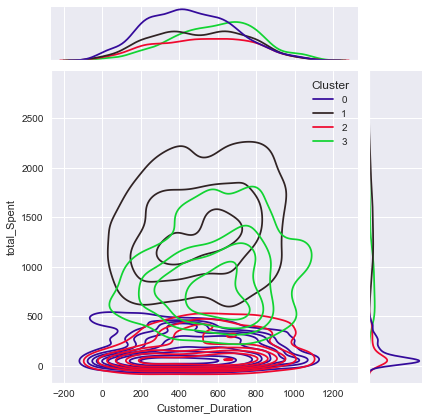

In [1395]:
sb.jointplot(data=df,x='Customer_Duration',y='total_Spent',hue='Cluster',kind='kde',palette=["#340A9B","#302324","#EF082E","#11D432"])
plt.show()

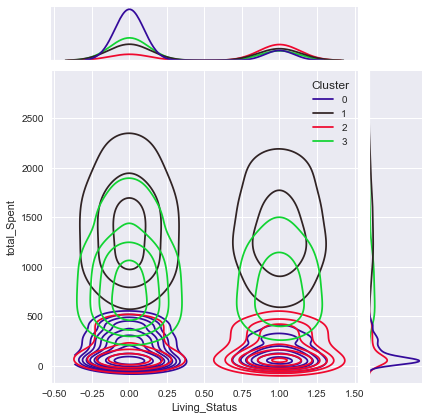

In [1396]:
sb.jointplot(data=df,x='Living_Status',y='total_Spent',hue='Cluster',kind='kde',palette=["#340A9B","#302324","#EF082E","#11D432"])
plt.show()

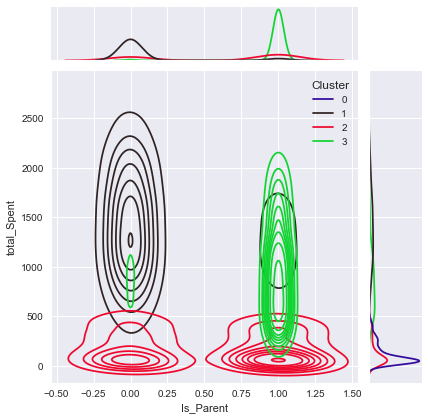

In [1409]:
sb.jointplot(data=df,x='Is_Parent',y='total_Spent',hue='Cluster',kind='kde',palette=["#340A9B","#302324","#EF082E","#11D432"])
plt.show()

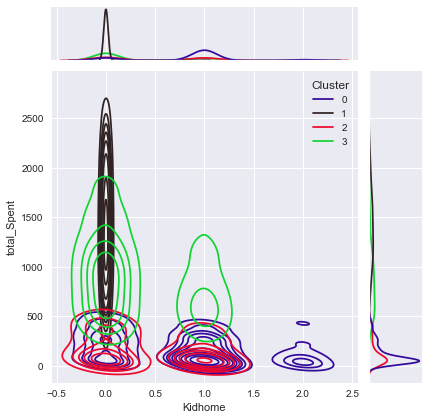

In [1398]:
sb.jointplot(data=df,x='Kidhome',y='total_Spent',hue='Cluster',kind='kde',palette=["#340A9B","#302324","#EF082E","#11D432"])
plt.show()

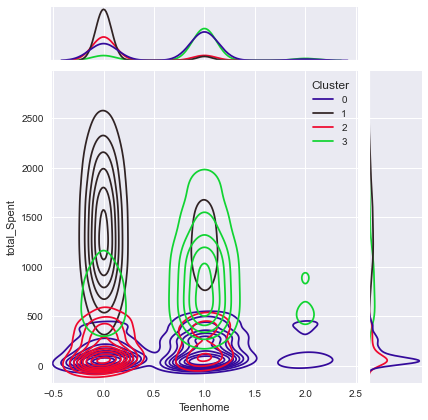

In [1404]:
sb.jointplot(data=df,x='Teenhome',y='total_Spent',hue='Cluster',kind='kde',palette=["#340A9B","#302324","#EF082E","#11D432"])
plt.show()

<h3> Cluster 0: </h3>

* Medium income and Low spent.
* Definetely a Parent with a maximum of 3 children at home.
* Most of the children might be Teens.
* Single parents are the subset of this group.
* Consists of all age groups.


<h3>Cluster 2: </h3>

* Low income and Low spent
* Maximum family size will be 3. 
* Can have only one or no child. Probability of child being kid is more than a teen
* Single parent can be a subset of this cluster

<h3>Cluster 1:</h3>

* High income and High spent customers
* Mostly not a Parent. 
* No kids at home.
* Maximum family size will be 2.
* Single parent with one teen at home will be a subset of this group.

<h3>Cluster 3: </h3>

* Medium salary and Medium spent customers.
* Mostly a parent with a maximum of 2 children.
* Family size can be of maximum 4.
* Probability of Teen at home is more comaring to the kid.

# 10. Building ML model inorder to predict the `Cluster` to which the customer belongs to

## 10.1. Loading the data

In [1479]:
df1[['Income','Age','total_Spent','Total_Children', 'Living_Status', 'Education_level', 'Family_Size',
       'Is_Parent', 'Customer_Duration', 'Cluster']].head(3)

,Income,Age,total_Spent,Total_Children,Living_Status,Education_level,Family_Size,Is_Parent,Customer_Duration,Cluster
0,58138.0,66,1617,0,1,0,1,0,971,1
1,46344.0,69,27,2,1,0,3,1,125,0
2,71613.0,58,776,0,0,0,2,0,472,1


In [1511]:
X = df[['Income','Age','total_Spent','Total_Children', 'Living_Status', 'Education_level', 'Family_Size',
       'Is_Parent', 'Customer_Duration', 'Cluster','Teenhome','Kidhome']].drop('Cluster',axis=1)
y = df[['Income','Age','total_Spent','Total_Children', 'Living_Status', 'Education_level', 'Family_Size',
       'Is_Parent', 'Customer_Duration', 'Cluster','Teenhome','Kidhome']]['Cluster']

## 10.2. Dividing train test splits

In [1512]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

## 10.3. Performing scaling on the data

In [1513]:
 
scalar_x = StandardScaler()
X_train = scalar_x.fit_transform(X_train)
X_test = scalar_x.transform(X_test)


## 10.4. Modelling part 

In [1514]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 10.4.1. Model selection

In [1515]:
RF = RandomForestClassifier()
xgb = XGBClassifier()
LR = LogisticRegression()
Support_VC = SVC()

In [1516]:
models = {
    'RF':RF,
    'xgb':xgb,
    "LR" :LR,
    "Support_VC" : Support_VC
}

### 10.4.2. Model metrics

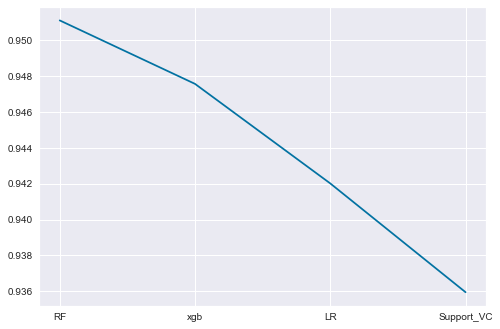

In [1517]:
model_name = []
accuracies = []
for model in models:
    result = cross_val_score(estimator=models[model],X=X_train,y=y_train,cv=5)
    model_name.append(model)
    accuracies.append(result.mean())
    
    
plt.plot(model_name, accuracies)

XGBoost and Random forest classifiers are performing really good. Let's implement both the models and select the final model with low variance

### 10.4.3. XGB Implementation on test data and measuring the accuracy

In [1518]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_predict = xgb.predict(X_test)
print(accuracy_score(y_predict,y_test))

0.9411764705882353


### 10.4.4. Random Forest classifier Implementation on test data and measuring the accuracy

In [1527]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_predict = RF.predict(X_test)
print(accuracy_score(y_predict,y_test))

0.9457013574660633


Random forest classifier is performing better in comparison with XGB classifier. Let's perform the hyper parameter tuning on the RF classifier.

In [1520]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## 10.5. Implementing RandomizedSearchCV

In [1521]:
RF = RandomForestClassifier()
grid = {
    'n_estimators':[90,80,110,120,130,140,150],
    'min_samples_split': [1,3,5,7],
    'min_samples_leaf': [1,3,5,7,9],
    'max_features': ["sqrt", "log2", None],
    'criterion':['gini','log_loss','entropy']
    
}
Random_CV = RandomizedSearchCV(estimator=RF,param_distributions=grid,n_jobs=-1,cv=5)
Random_CV.fit(X_train,y_train)
Random_CV.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_split=7,
                       n_estimators=150)

In [1522]:
RF = RandomForestClassifier(criterion='log_loss', max_features='log2',
                       min_samples_split=3, n_estimators=120)
RF.fit(X_train,y_train)
y_predict = RF.predict(X_test)
print(accuracy_score(y_predict,y_test))

0.9366515837104072


Accuracy is not improving further with Hyper parameter tuning. Let's proceed with the default parameters. 

## 10.6. Proceeding with the Base model

In [1525]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
y_predict = RF.predict(X_test)
print(accuracy_score(y_predict,y_test))

0.9411764705882353


In [1526]:
print("Confusion matrix: \n\n", confusion_matrix(y_test,y_predict))
print("\nClassification report : \n", classification_report(y_test,y_predict))

Confusion matrix: 

 [[71  0  2  3]
 [ 0 54  1  3]
 [ 0  0 28  2]
 [ 1  0  1 55]]

Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96        76
           1       1.00      0.93      0.96        58
           2       0.88      0.93      0.90        30
           3       0.87      0.96      0.92        57

    accuracy                           0.94       221
   macro avg       0.93      0.94      0.94       221
weighted avg       0.95      0.94      0.94       221



Let's proceed futher with the model deployment part

# 11. Deployment part

`input vector` = ['Income','Age','total_Spent','Total_Children', 'Living_Status', 'Education_level', 'Family_Size',
       'Is_Parent', 'Customer_Duration','Teenhome','Kidhome']

In [1541]:
import pickle
    

In [1542]:
pickle.dump(RF, open("RF.pkl",'wb'))
pickle.dump(scalar_x, open("scalar_x.pkl",'wb'))

In [1540]:
df['Education_level'].value_counts()

0    1115
1     837
2     252
Name: Education_level, dtype: int64

In [1494]:
temp  = pd.read_csv(r"C:\Users\prasa\Dropbox\PC\Desktop\ML-Projects\Portfolio\Customer segmentation\marketing_campaign.csv",sep='\t')
temp.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [1543]:
sample = df[['Income','Age','total_Spent','Total_Children', 'Living_Status', 'Education_level', 'Family_Size',
       'Is_Parent', 'Customer_Duration', 'Teenhome','Kidhome']].iloc[0]
sample

Income               58138.0
Age                     66.0
total_Spent           1617.0
Total_Children           0.0
Living_Status            1.0
Education_level          0.0
Family_Size              1.0
Is_Parent                0.0
Customer_Duration      971.0
Teenhome                 0.0
Kidhome                  0.0
Name: 0, dtype: float64

In [1544]:
scalar_x.transform(np.array(sample).reshape(1,-1))

array([[ 0.2963957 ,  1.02798103,  1.69067759, -1.27106842,  1.34638997,
        -0.88971737, -1.77317214, -1.59407385,  1.96607985, -0.93550083,
        -0.82777823]])

In [1538]:
RF.predict(scalar_x.transform(np.array(sample).reshape(1,-1)))

array([1])

In [1546]:
df['Cluster'].iloc[0]

1